In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.StringIO(uploaded['Dataset.csv'].decode('utf-8')))
df['New'].values

array([   2,    3,   13,   10,   15,   18,   34,   44,  106,  143,  205,
        385,  523,  835,  586,  591, 1234, 1076,  743,  595,  881,  958,
       1075, 1289, 1365, 1209, 1053, 1178, 1192, 1046, 1237,  966, 1028,
       1411, 1762, 2206, 2389, 2926, 3076, 2901, 3186, 3111, 2987, 2875,
       2715, 2560, 2483, 2274, 2089, 1997, 1643, 1972, 1837, 1657, 1617,
       1574, 1512, 1606, 1499, 1374, 1343, 1294, 1297, 1194, 1030, 1168,
       1134, 1153,  991, 1112, 1073,  983, 1006,  802,  976, 1223, 1323,
       1680, 1485, 1556, 1529, 1383, 1683, 1481, 1958, 1808, 2102, 1757,
       1806, 2294, 2111, 2346, 2392, 2311, 1869, 2180, 2023, 1787, 2080,
       2258, 2819, 2282, 2516, 2979, 3117, 3134, 3574, 2886, 2269, 2364,
       2043, 2095, 2011, 2218, 2369, 2410, 2472, 2449, 2563, 2612, 2596,
       2615, 2322, 2368, 2573, 2445, 2531, 2595, 2628, 2456, 2489, 2536,
       2457, 2549, 2652, 2566, 2449, 2560, 2613, 2637, 2691, 2079, 2262,
       2397, 2186, 2349, 2521, 2388, 2500, 2379, 21

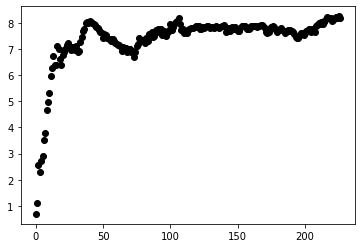

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

infections= df['New'].values
x = range(len(infections))
t = np.log(infections)
plt.plot(x, t, 'o', color='black')

In [ ]:
def update(x, t, w, b, alpha):
  N = len(x)
  y = np.dot(x,w) + b
  dedw = np.dot(y - t, x)
  dedb = np.sum(y - t)
  w = w - (alpha/float(N)) * dedw 
  b = b - (alpha/float(N)) * dedb 
  return w, b

In [ ]:
def cost(x, t, w, b):
  y = np.dot(x, w) + b
  return np.sum((y - t)** 2) / (2 * len(y)) 

In [ ]:
def train(x, t, w, b, alpha, epochs):
  for e in range(epochs):
    w, b = update(x, t, w, b, alpha)
    if e % 10000 == 0:
      print("w: ", w, " b: ", b, " cost: ", cost(x, t, w, b))
  return w, b


In [ ]:
w, b = train(x, t, w=0, b=0, alpha=0.0001, epochs=100000)

w:  0.0873651678612704  b:  0.0007387351147868994  cost:  16.665308837094923
w:  0.04182256025237707  b:  1.416297158180254  cost:  3.489988637177875
w:  0.03453232571531251  b:  2.517106338338077  cost:  2.2717815960548546
w:  0.028864033027021042  b:  3.3730059113036885  cost:  1.535332659524553
w:  0.024456830235836717  b:  4.038483718181812  cost:  1.090123415276017
w:  0.021030148250493323  b:  4.5559050669421906  cost:  0.8209787925704771
w:  0.018365839394053944  b:  4.958209770999791  cost:  0.6582714165060476
w:  0.016294289798011743  b:  5.27100914677868  cost:  0.5599090938274256
w:  0.014683621530896624  b:  5.514216468246163  cost:  0.5004456155466526
w:  0.013431297052810993  b:  5.703314675581494  cost:  0.4644978547276896


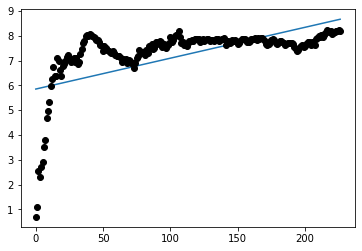

In [ ]:
y = np.dot(x, w) + b
plt.plot(x, y)
plt.plot(x, t, 'o', color='black')